## Sleep vs Health vs Lifestyle

In [115]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
sns.set_style("darkgrid")

In [116]:
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
df['BMI Category']= df['BMI Category'].replace('Normal Weight', 'Normal')

#added columns to numerically represent some categoricals
df['Sleep Disorder Present'] = df['Sleep Disorder'].apply(lambda x: 0 if pd.isna(x) else 1)
df['BMI Numeric'] = df['BMI Category'].apply(lambda x: 1 if x=='Normal' else 2 if x=='Overweight' else 3 if x=='Obese' else None)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
 13  Sleep Disorder Present   374 non-null    int64  
 14  BMI Numeric              3

In [117]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Sleep Disorder Present,BMI Numeric
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920,0.414439,1.449198
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679,0.493285,0.549274
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000,0.000000,1.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000,0.000000,1.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000,0.000000,1.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000,1.000000,2.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000,1.000000,3.000000


In [118]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Sleep Disorder Present,BMI Numeric
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN,0,2
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,0,1
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,0,1
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,1,3
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,1,3


In [119]:
#df for categorical columns
df_cat = df[['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']]
#df for the numeric columns
df_num = df[['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Blood Pressure', 'Heart Rate', 'Daily Steps']]

## Exploratory Data Analysis

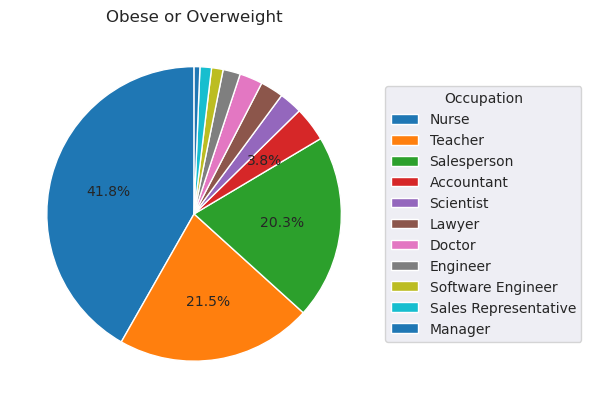

In [120]:
obeseOverweight = df[(df['BMI Category'] == 'Overweight') | (df['BMI Category'] == 'Obese')]
normalWeight = df[(df['BMI Category'] == 'Normal') | (df['BMI Category']== 'Normal Weight')]
obeseOverweightByOcc = obeseOverweight['Occupation'].value_counts()

fig, ax = plt.subplots(figsize=(6, 6))


obeseOverweightByOcc.plot.pie(
    autopct=lambda pct: f'{pct:.1f}%' if pct >= 3 else '',
    startangle=90,
    labels=[''] * len(obeseOverweightByOcc),  
    ax=ax
)

ax.legend(obeseOverweightByOcc.index, title='Occupation', bbox_to_anchor=(1, 0.5), loc='center left')
ax.set_title('Obese or Overweight')
ax.set_ylabel('')  
plt.tight_layout()
plt.show()


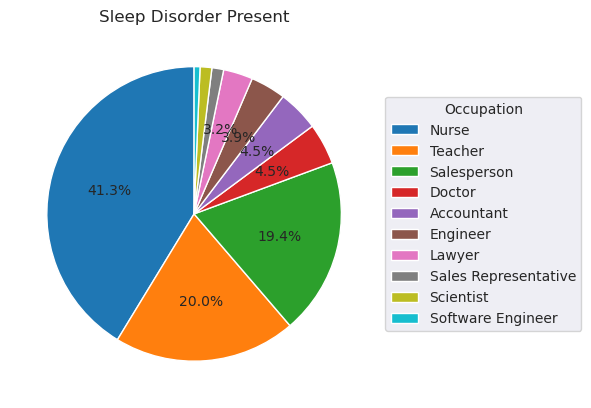

In [121]:
sleepDisPres= df[df['Sleep Disorder Present'] == 1]
sleepDisPresByOcc = sleepDisPres['Occupation'].value_counts()

fig, ax = plt.subplots(figsize=(6, 6))


sleepDisPresByOcc.plot.pie(
    autopct=lambda pct: f'{pct:.1f}%' if pct >= 3 else '',
    startangle=90,
    labels=[''] * len(sleepDisPresByOcc),  
    ax=ax
)

ax.legend(sleepDisPresByOcc.index, title='Occupation', bbox_to_anchor=(1, 0.5), loc='center left')
ax.set_title('Sleep Disorder Present')
ax.set_ylabel('')  
plt.tight_layout()
plt.show()



In [122]:
print("Correlation between BMI and presence of Sleep Disorder: " + str(df['BMI Numeric'].corr(df['Sleep Disorder Present'])))

Correlation between BMI and presence of Sleep Disorder: 0.7853886706472399


### Sleep Duration vs Physical Activity (for entire dataset)

Correlation between Phyiscal Act. and Sleep duration: 0.21236031472575861
Correlation between Sleep Duration and Stress Level: -0.8110230278940451
Correlation between Physical Activity and Stress Level: -0.03413446351674205


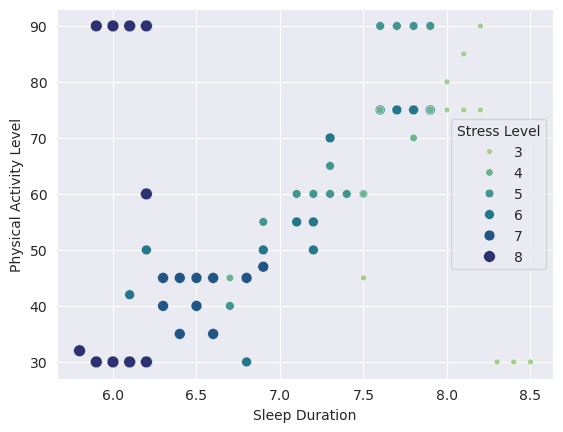

In [123]:
sns.scatterplot(x='Sleep Duration', y='Physical Activity Level', size='Stress Level', hue='Stress Level', palette='crest', data=df)

#Correlation between Phyiscal Act. and Sleep duration
print("Correlation between Phyiscal Act. and Sleep duration: " + str(df['Physical Activity Level'].corr(df['Sleep Duration'])))

#Correlation between Sleep Duration and Stress Level
print("Correlation between Sleep Duration and Stress Level: " + str(df['Sleep Duration'].corr(df['Stress Level'])))

#Correlation between Physical Activity and Stress Level
print("Correlation between Physical Activity and Stress Level: " + str(df['Physical Activity Level'].corr(df['Stress Level'])))

### Sleep Duration vs Physical Activity (for Obese and OverWeight)

Correlation between Phyiscal Act. and Sleep duration: 0.21514782513728278
Correlation between Sleep Duration and Stress Level: -0.8476778159093987
Correlation between Physical Activity and Stress Level: 0.01789645300906814


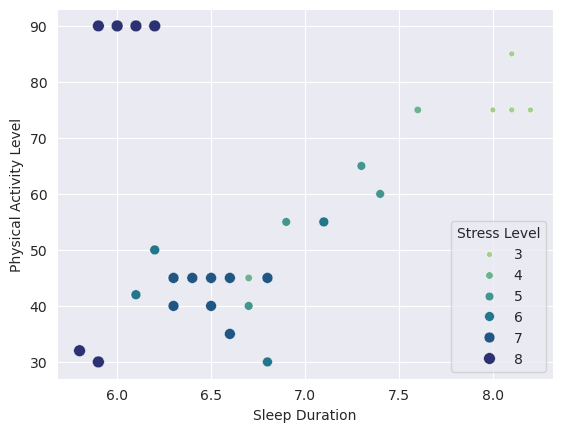

In [124]:
sns.scatterplot(x='Sleep Duration', y='Physical Activity Level', size='Stress Level', hue='Stress Level', palette='crest', data=obeseOverweight)

#Correlation between Phyiscal Act. and Sleep duration
print("Correlation between Phyiscal Act. and Sleep duration: " + str(obeseOverweight['Physical Activity Level'].corr(obeseOverweight['Sleep Duration'])))

#Correlation between Sleep Duration and Stress Level
print("Correlation between Sleep Duration and Stress Level: " + str(obeseOverweight['Sleep Duration'].corr(obeseOverweight['Stress Level'])))

#Correlation between Physical Activity and Stress Level
print("Correlation between Physical Activity and Stress Level: " + str(obeseOverweight['Physical Activity Level'].corr(obeseOverweight['Stress Level'])))


### Sleep Duration vs Physical Activity (Normal Weight)

Correlation between Phyiscal Act. and Sleep duration: 0.289538497902079
Correlation between Sleep Duration and Stress Level: -0.7966018356549011
Correlation between Physical Activity and Stress Level: -0.10038162461011879


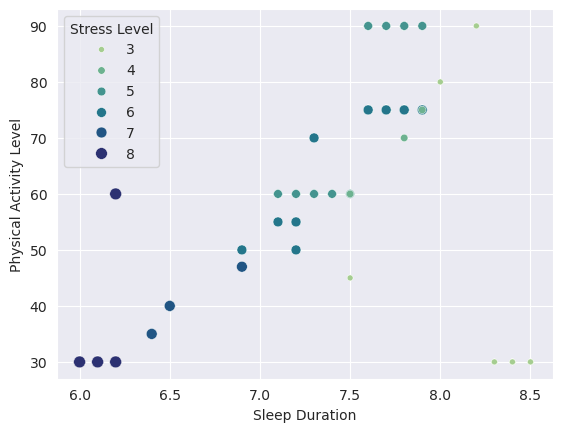

In [125]:
sns.scatterplot(x='Sleep Duration', y='Physical Activity Level', hue='Stress Level', size='Stress Level', palette='crest', data=normalWeight)

#Correlation between Phyiscal Act. and Sleep duration
print("Correlation between Phyiscal Act. and Sleep duration: " + str(normalWeight['Physical Activity Level'].corr(normalWeight['Sleep Duration'])))

#Correlation between Sleep Duration and Stress Level
print("Correlation between Sleep Duration and Stress Level: " + str(normalWeight['Sleep Duration'].corr(normalWeight['Stress Level'])))

#Correlation between Physical Activity and Stress Level
print("Correlation between Physical Activity and Stress Level: " + str(normalWeight['Physical Activity Level'].corr(normalWeight['Stress Level'])))

<Axes: xlabel='Sleep Duration', ylabel='Stress Level'>

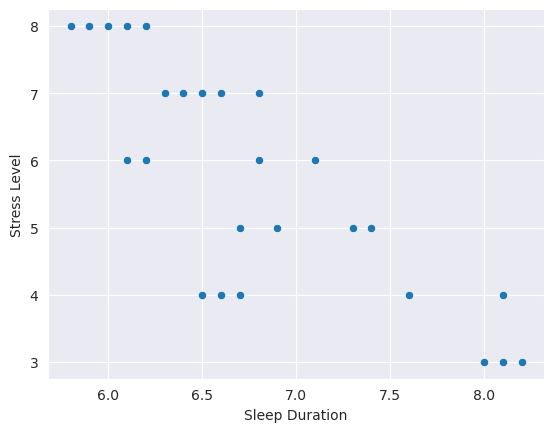

In [126]:
sns.scatterplot(x='Sleep Duration', y='Stress Level', data=obeseOverweight)

In [127]:
occupations = ['Software Engineer', 'Doctor', 'Sales Representative', 'Teacher', 'Nurse', 'Engineer', 'Accountant', 'Scientist', 'Lawyer',
               'Salesperson', 'Manager']
occupations_dfs = {occ: df[df['Occupation'] == occ] for occ in occupations} #dictionary of the subsets for each occupation

### Sleep Duration and Sleep Disorder Presence based on Gender

Text(0.5, 1.0, 'Sleep Duration by Gender')

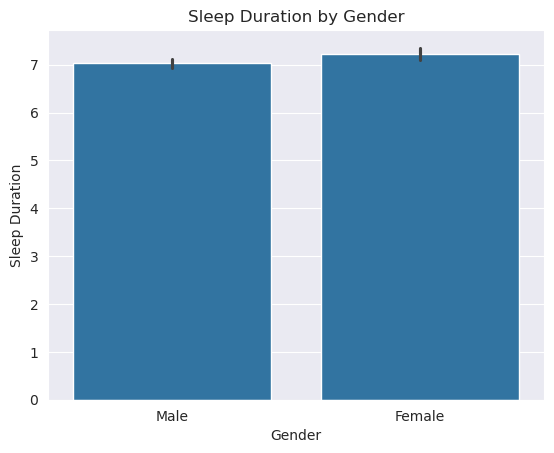

In [128]:
sns.barplot(x='Gender', y='Sleep Duration', data=df)
plt.title("Sleep Duration by Gender")

##### The graph above shows that in this dataset the females are on average recieving slightly more sleep at night. 
##### The gender split for this data set is:
#####
#### Males- 
##### Count: 189     
##### Mean Age: approx. 37
#####
#### Females- 
##### Count: 185   
##### Mean Age: approx. 37

Text(0.5, 1.0, 'Sleep Disorder Presence by Gender')

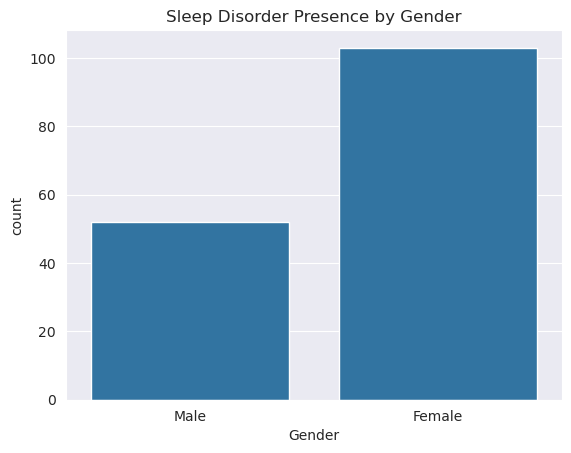

In [129]:
disorder_pres = df[df['Sleep Disorder Present'] == 1]
sns.countplot(data=disorder_pres, x='Gender')
plt.title("Sleep Disorder Presence by Gender")

## EDA Summary & Findings

1. Sleep Disorder and BMI

    Correlation between BMI and presence of sleep disorder: 0.785

        - Strong positive correlation — higher BMI is strongly associated with a greater chance of having a sleep disorder.

2. Sleep Duration vs Physical Activity

    Entire dataset:

        Physical Activity vs Sleep Duration: +0.21

        Stress Level vs Sleep Duration: −0.81

        Physical Activity vs Stress Level: −0.03

        - More activity tends to slightly increase sleep; more stress strongly decreases sleep.

    Obese and Overweight individuals:

        Physical Activity vs Sleep Duration: +0.22

        Stress Level vs Sleep Duration: −0.85

        ➤ Sleep duration is even more negatively affected by stress in these groups.

## Predictive Modeling using Linear Regression

### The Impact of Stress on Sleep

In [130]:
X = df[['Sleep Duration']]
y = df['Stress Level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [131]:
y_pred = model.predict(X_test)

In [134]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² score: {r2:.3f}")
print(f"Mean Squared Error: {mse:.3f}")
print(f"Intercept: {model.intercept_:.2f}")
print(f"Coefficient: {model.coef_[0]:.2f}")


R² score: 0.708
Mean Squared Error: 0.911
Intercept: 18.17
Coefficient: -1.80


A simple linear regression was performed to examine the relationship between sleep duration and stress level. The model yielded an R² score of 0.708, indicating that approximately 70.8% of the variation in stress level can be explained by differences in sleep duration alone.

The resulting regression equation is:
Stress Level= (−1.80 * Sleep Duration) +18.17


This suggests a strong negative relationship between sleep and stress: for every additional hour of sleep, stress levels are predicted to decrease by 1.8 points on average. These findings highlight the significant impact that sleep duration may have on managing stress levels.

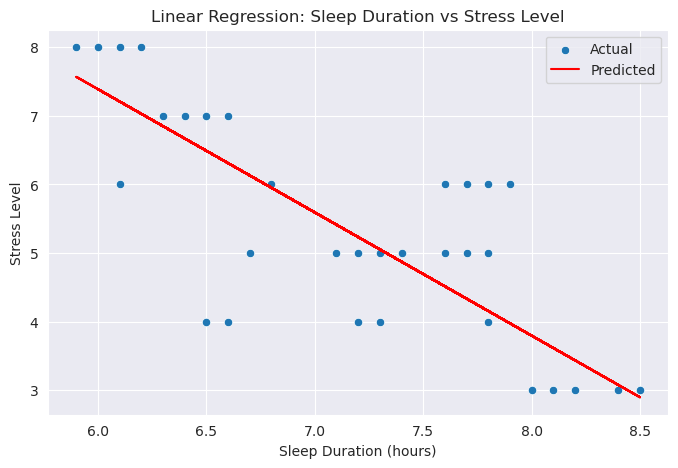

In [133]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_test['Sleep Duration'], y=y_test, label='Actual')
plt.plot(X_test['Sleep Duration'], y_pred, color='red', label='Predicted')
plt.title("Linear Regression: Sleep Duration vs Stress Level")
plt.xlabel("Sleep Duration (hours)")
plt.ylabel("Stress Level")
plt.legend()
plt.show()


### Prediciting the likelihood of a Sleeping Disorder